In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #28x28 images of hand-written digits from 0 to 9

(x_train, y_train),(x_test, y_test) = mnist.load_data() 

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3241 - accuracy: 0.9082
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1504 - accuracy: 0.9563
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1028 - accuracy: 0.9695


In [3]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1045 - accuracy: 0.9682
0.10451605170965195 0.9682000279426575


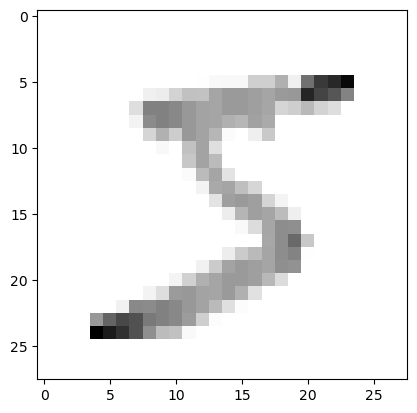

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)

#print(x_train[0])

In [14]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [6]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [7]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 1s 3ms/step


In [8]:
print(predictions)

[[3.9059071e-08 4.9539567e-10 2.5244795e-05 ... 9.9956006e-01
  6.8180776e-07 2.5927427e-06]
 [2.4467472e-06 9.7496472e-03 9.8972052e-01 ... 3.8552869e-10
  2.5247737e-06 2.3238282e-10]
 [2.6082939e-06 9.9685127e-01 5.1240198e-04 ... 9.2989486e-04
  9.8311063e-04 2.2771931e-06]
 ...
 [9.1565742e-09 8.2599030e-08 2.6687169e-06 ... 1.3648228e-04
  1.6099404e-04 4.1397786e-04]
 [2.7836159e-06 1.3568233e-07 8.9423003e-07 ... 1.9472996e-07
  3.0331954e-04 1.4135225e-08]
 [1.0745050e-05 1.5926881e-07 5.1143932e-05 ... 1.9438474e-08
  4.3743924e-07 8.1888949e-09]]


In [9]:
import numpy as np

print(np.argmax(predictions[56]))

4


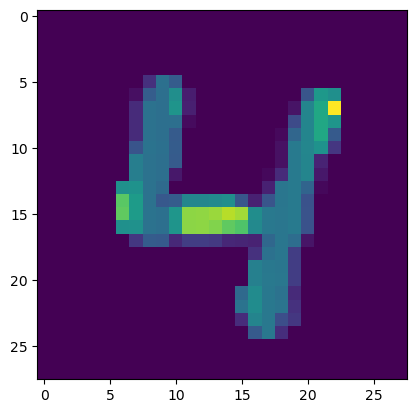

In [10]:
plt.imshow(x_test[56])